In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import scipy.stats as stat

Import a 311 NYC service request.

In [2]:
#importing dataset
df = pd.read_csv(r"C:\Users\Asus\Documents\Dataset\311_Service_Requests_from_2010_to_Present.csv", low_memory=False)
#pd.set_option('display.max_columns',None)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
df.shape

(300698, 53)

In [4]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

Removing useless columns. (columns having huge variance and zero variance)

In [6]:
for col in df.columns[0:20]:
    print(col+ ' :', df[col].nunique())

Unique Key : 300698
Created Date : 259493
Closed Date : 237165
Agency : 1
Agency Name : 3
Complaint Type : 24
Descriptor : 45
Location Type : 18
Incident Zip : 201
Incident Address : 107652
Street Name : 7320
Cross Street 1 : 5982
Cross Street 2 : 5823
Intersection Street 1 : 4413
Intersection Street 2 : 4172
Address Type : 5
City : 53
Landmark : 116
Facility Type : 1
Status : 4


In [7]:
for col in df.columns[20:40]:
    print(col+ ' :', df[col].nunique())

Due Date : 259851
Resolution Description : 18
Resolution Action Updated Date : 237895
Community Board : 75
Borough : 6
X Coordinate (State Plane) : 63226
Y Coordinate (State Plane) : 73694
Park Facility Name : 2
Park Borough : 6
School Name : 2
School Number : 2
School Region : 1
School Code : 1
School Phone Number : 2
School Address : 2
School City : 2
School State : 2
School Zip : 1
School Not Found : 1
School or Citywide Complaint : 0


In [8]:
for col in df.columns[40:54]:
    print(col+ ' :', df[col].nunique())

Vehicle Type : 0
Taxi Company Borough : 0
Taxi Pick Up Location : 0
Bridge Highway Name : 29
Bridge Highway Direction : 34
Road Ramp : 2
Bridge Highway Segment : 160
Garage Lot Name : 0
Ferry Direction : 1
Ferry Terminal Name : 2
Latitude : 125122
Longitude : 125216
Location : 126048


In [9]:
for col in df.columns:
    if df[col].nunique() == 2:
        print(df[col].value_counts())

Unspecified                        300697
Alley Pond Park - Nature Center         1
Name: Park Facility Name, dtype: int64
Unspecified                        300697
Alley Pond Park - Nature Center         1
Name: School Name, dtype: int64
Unspecified    300697
Q001                1
Name: School Number, dtype: int64
Unspecified    300697
7182176034          1
Name: School Phone Number, dtype: int64
Unspecified                                     300697
Grand Central Parkway, near the soccer field         1
Name: School Address, dtype: int64
Unspecified    300697
QUEENS              1
Name: School City, dtype: int64
Unspecified    300697
NY                  1
Name: School State, dtype: int64
Roadway    162
Ramp        51
Name: Road Ramp, dtype: int64
St. George Terminal (Staten Island)    1
Barberi                                1
Name: Ferry Terminal Name, dtype: int64


In [10]:
useless_col_list = ['Unique Key','Agency','Facility Type','School Region','School Code','School Zip','School Not Found',
                    'School or Citywide Complaint', 'Vehicle Type','Taxi Company Borough','Taxi Pick Up Location',
                    'Garage Lot Name','Ferry Direction','Park Facility Name','School Name','School Number','School Phone Number',
                    'School Address','School City','School State','Road Ramp','Ferry Terminal Name']
df.drop(useless_col_list, axis=1, inplace=True)

In [11]:
df.isna().mean()

Created Date                      0.000000
Closed Date                       0.007197
Agency Name                       0.000000
Complaint Type                    0.000000
Descriptor                        0.019668
Location Type                     0.000436
Incident Zip                      0.008696
Incident Address                  0.147690
Street Name                       0.147690
Cross Street 1                    0.163882
Cross Street 2                    0.165545
Intersection Street 1             0.854146
Intersection Street 2             0.855796
Address Type                      0.009362
City                              0.008693
Landmark                          0.998839
Status                            0.000000
Due Date                          0.000010
Resolution Description            0.000000
Resolution Action Updated Date    0.007273
Community Board                   0.000000
Borough                           0.000000
X Coordinate (State Plane)        0.011773
Y Coordinat

In [12]:
#dropping the columns which has more than 30% missing cells
huge_missing_columns_list = []
for col in df.columns:
    if df[col].isna().mean() > 0.3:
        huge_missing_columns_list.append(col)

huge_missing_columns_list

['Intersection Street 1',
 'Intersection Street 2',
 'Landmark',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Bridge Highway Segment']

In [13]:
df.drop(huge_missing_columns_list, axis=1, inplace=True)
df.shape

(300698, 25)

In [14]:
df.describe()

,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
count,298083.000000,2.971580e+05,297158.000000,297158.000000,297158.000000
mean,10848.888645,1.004854e+06,203754.534416,40.725885,-73.925630
std,583.182081,2.175338e+04,29880.183529,0.082012,0.078454
min,83.000000,9.133570e+05,121219.000000,40.499135,-74.254937
25%,10310.000000,9.919752e+05,183343.000000,40.669796,-73.972142
50%,11208.000000,1.003158e+06,201110.500000,40.718661,-73.931781
75%,11238.000000,1.018372e+06,224125.250000,40.781840,-73.876805
max,11697.000000,1.067173e+06,271876.000000,40.912869,-73.700760


Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [15]:
#converting Created Date and CloseD Data to datetime
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
#creating a new column Request_Closing_Time
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']
df.head()

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,2015-12-31 23:59:44,2016-01-01 01:26:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,2015-12-31 23:59:29,2016-01-01 04:51:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,2015-12-31 23:57:46,2016-01-01 07:43:00,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,2015-12-31 23:56:58,2016-01-01 03:24:00,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02


Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

In [16]:
#Maximum complaints are of Broad Driveway type
df_complaint_percent = df['Complaint Type'].value_counts().to_frame()
df_complaint_percent = df_complaint_percent.reset_index()
df_complaint_percent = df_complaint_percent.rename(columns={'index':'Complaint Type', 'Complaint Type':'Complaint Count'})
df_complaint_percent.head()

,Complaint Type,Complaint Count
0,Blocked Driveway,77044
1,Illegal Parking,75361
2,Noise - Street/Sidewalk,48612
3,Noise - Commercial,35577
4,Derelict Vehicle,17718


In [17]:
df_complaint_percent['Percentage'] = np.around((df_complaint_percent['Complaint Count']/df_complaint_percent['Complaint Count'].sum())*100,
                                    decimals=2)
df_complaint_percent.head()

,Complaint Type,Complaint Count,Percentage
0,Blocked Driveway,77044,25.62
1,Illegal Parking,75361,25.06
2,Noise - Street/Sidewalk,48612,16.17
3,Noise - Commercial,35577,11.83
4,Derelict Vehicle,17718,5.89


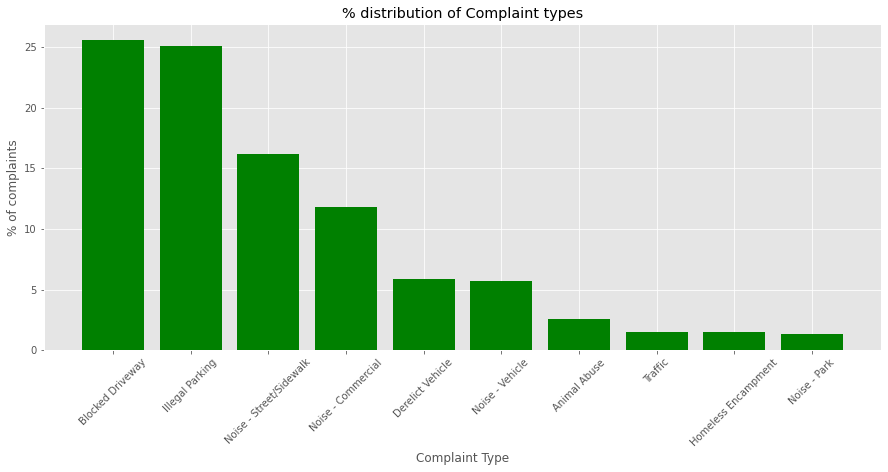

In [18]:
plt.figure(figsize=(15,6))
plt.bar(df_complaint_percent['Complaint Type'][0:10], df_complaint_percent['Percentage'][0:10], color = 'g')
plt.xticks(rotation=45)
plt.xlabel('Complaint Type')
plt.ylabel('% of complaints')
plt.title('% distribution of Complaint types')
plt.show()

In [19]:
#Maximum complaints are occurred in Street/Sidewalk
df_loc_percent = df['Location Type'].value_counts().to_frame()
df_loc_percent = df_loc_percent.reset_index()
df_loc_percent = df_loc_percent.rename(columns={'index':'Location Type', 'Location Type':'Count'})
df_loc_percent.head()

,Location Type,Count
0,Street/Sidewalk,249299
1,Store/Commercial,20381
2,Club/Bar/Restaurant,17360
3,Residential Building/House,6960
4,Park/Playground,4773


In [20]:
df_loc_percent['Percentage'] = np.around((df_loc_percent['Count']/df_loc_percent['Count'].sum())*100, decimals=2)
df_loc_percent.head()

,Location Type,Count,Percentage
0,Street/Sidewalk,249299,82.94
1,Store/Commercial,20381,6.78
2,Club/Bar/Restaurant,17360,5.78
3,Residential Building/House,6960,2.32
4,Park/Playground,4773,1.59


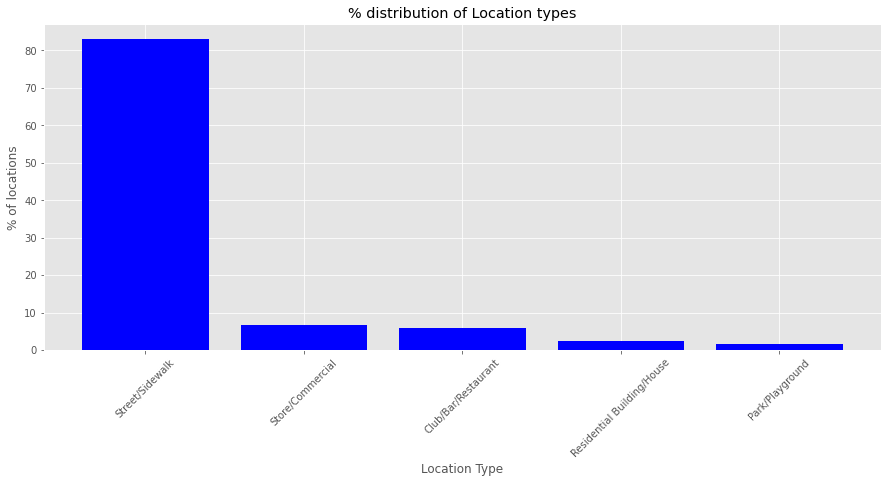

In [21]:
plt.figure(figsize=(15,6))
plt.bar(df_loc_percent['Location Type'][0:5], df_loc_percent['Percentage'][0:5], color = 'b')
plt.xticks(rotation=45)
plt.xlabel('Location Type')
plt.ylabel('% of locations')
plt.title('% distribution of Location types')
plt.show()

In [22]:
#Complaints that are resolved within a day
request_resolved_within_24hr = df[df['Request_Closing_Time']<pd.Timedelta("1 days")]

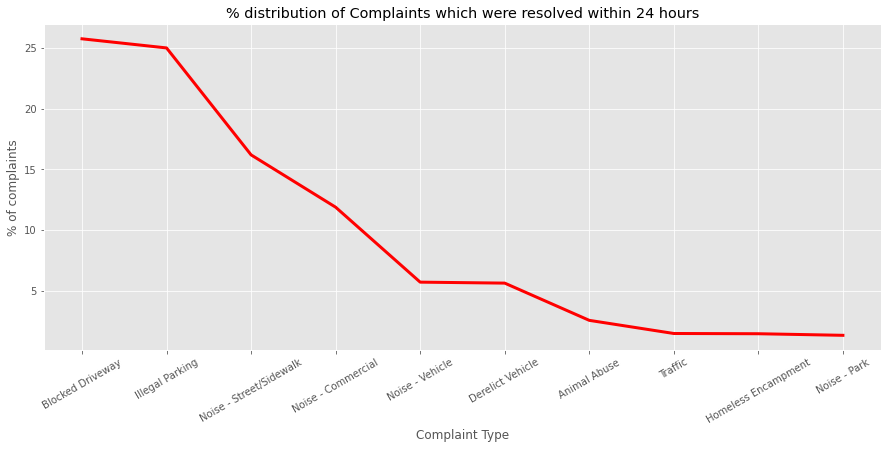

In [23]:
#complaints that are resolved within 24 hrs
plt.figure(figsize=(15,6))
plt.plot(np.around((request_resolved_within_24hr['Complaint Type'].value_counts()/request_resolved_within_24hr['Complaint Type'].value_counts().sum())*100,
                     decimals=2)[0:10], color = 'r', linewidth = 3)
plt.xlabel('Complaint Type')
plt.ylabel('% of complaints')
plt.xticks(rotation=30)
plt.title('% distribution of Complaints which were resolved within 24 hours')
plt.show()

In [24]:
#creating a new feature which will tell a complaint is resolved before duedate or after
df['Due Date'] = pd.to_datetime(df['Due Date'])
df['Resolved Late'] = np.where(((df['Due Date']-df['Closed Date'])>pd.Timedelta("0 days 00:00:00")), 'No', 'Yes')
df.head(5)

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Request_Closing_Time,Resolved Late
0,2015-12-31 23:59:45,2016-01-01 00:55:00,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,No
1,2015-12-31 23:59:44,2016-01-01 01:26:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,No
2,2015-12-31 23:59:29,2016-01-01 04:51:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,No
3,2015-12-31 23:57:46,2016-01-01 07:43:00,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,No
4,2015-12-31 23:56:58,2016-01-01 03:24:00,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,No


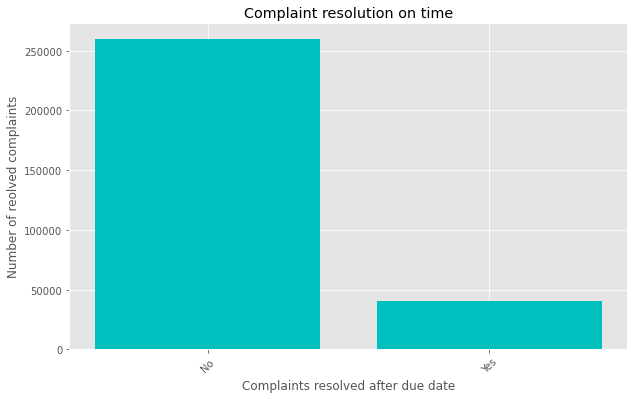

In [25]:
#checking late complaints resolution
#over 25000 complaints were resolved before due date
plt.figure(figsize=(10,6))
plt.bar(df['Resolved Late'].unique(), df['Resolved Late'].value_counts(), color = 'c')
plt.xlabel('Complaints resolved after due date')
plt.ylabel('Number of reolved complaints')
plt.xticks(rotation=45)
plt.title('Complaint resolution on time')
plt.show()

Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [26]:
df_new = df[['City','Complaint Type','Request_Closing_Time']]
df_null_dropped = df_new.dropna(how='any')
df_null_dropped.shape

(298028, 3)

In [27]:
#converting timedelta into hours
def convert_td_into_hrs(td_series):
    return [td_series[i].seconds/3600 for i in td_series.index]

In [28]:
req_closing_time_in_hrs = convert_td_into_hrs(df_null_dropped['Request_Closing_Time'])
req_closing_time_in_hrs = np.round_(req_closing_time_in_hrs, decimals=2)

In [29]:
df_null_dropped['Request_Closing_Time_in_hrs'] = req_closing_time_in_hrs
df_null_dropped.head()

<ipython-input-29-f8df56b14ab6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null_dropped['Request_Closing_Time_in_hrs'] = req_closing_time_in_hrs


,City,Complaint Type,Request_Closing_Time,Request_Closing_Time_in_hrs
0,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:15,0.92
1,ASTORIA,Blocked Driveway,0 days 01:26:16,1.44
2,BRONX,Blocked Driveway,0 days 04:51:31,4.86
3,BRONX,Illegal Parking,0 days 07:45:14,7.75
4,ELMHURST,Illegal Parking,0 days 03:27:02,3.45


In [30]:
df_city_complainttype_grp = df_null_dropped.groupby(['City','Complaint Type'])['Request_Closing_Time_in_hrs'].mean().to_frame()
df_city_complainttype_grp = df_city_complainttype_grp.rename(columns={'Request_Closing_Time_in_hrs':'avg(Request_Closing_Time_in_hrs)'})
df_city_complainttype_grp = df_city_complainttype_grp.sort_values(['City','avg(Request_Closing_Time_in_hrs)'])

In [31]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
df_city_complainttype_grp.head(10)

avg(Request_Closing_Time_in_hrs)
City    Complaint Type                                            
ARVERNE Drinking                                          0.240000
        Vending                                           0.480000
        Urinating in Public                               0.690000
        Panhandling                                       1.030000
        Noise - Park                                      1.285000
        Graffiti                                          1.530000
        Noise - House of Worship                          1.562727
        Homeless Encampment                               1.812500
        Noise - Vehicle                                   1.860000
        Noise - Street/Sidewalk                           1.992759

Perform a statistical test for the following:

Whether the average response time across complaint types is similar or not (overall)

In [32]:
df_complainttype_grp_avg_time = df_null_dropped.groupby('Complaint Type')['Request_Closing_Time_in_hrs'].mean().to_frame()
df_complainttype_grp_avg_time = df_complainttype_grp_avg_time.reset_index()
df_complainttype_grp_avg_time

,Complaint Type,Request_Closing_Time_in_hrs
0,Animal Abuse,4.626372
1,Animal in a Park,0.830000
2,Bike/Roller/Skate Chronic,3.529123
3,Blocked Driveway,4.382965
4,Derelict Vehicle,5.581199
5,Disorderly Youth,3.475000
6,Drinking,3.610071
7,Graffiti,5.664336
8,Homeless Encampment,4.099665
9,Illegal Fireworks,2.618333


In [33]:
#creating 3 samples to test
sample1 = df_complainttype_grp_avg_time.sample(frac=1/3)
rest_data = df_complainttype_grp_avg_time.drop(sample1.index)
sample2 = rest_data.sample(frac=1/2)
sample3 = rest_data.drop(sample2.index)

In [34]:
#Null Hypothesis states - there is no significant relationship among the average response time across complaint types
#Alternate Hypothesis states - there is a significant relationship among the average response time across complaint types
#performing 1 way Anova
F, P = stat.f_oneway(sample1['Request_Closing_Time_in_hrs'],sample2['Request_Closing_Time_in_hrs'],sample3['Request_Closing_Time_in_hrs'])
if (P<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.round_(P,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.round_(P,decimals=2)))

Null hypothesis is accepted since p value (0.18) is greater than 0.05


Are the type of complaint or service requested and location related?

In [35]:
#creating a dataframe to apply chi-square test
City_Complaint_df = pd.crosstab(df_null_dropped['Complaint Type'],df_null_dropped['City'],margins=True, margins_name='Total')
#City_Complaint = pd.crosstab(df_cc['Complaint Type'],df_cc['City'])
City_Complaint_df.head(6)

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside,Total
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,38,125,0,37,7,2,1415,2394,11,0,...,55,26,24,557,35,28,45,69,0,7767
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Bike/Roller/Skate Chronic,0,15,0,0,1,0,20,111,0,0,...,1,1,0,7,2,4,2,4,0,422
Blocked Driveway,35,2618,116,377,95,3,12754,28147,147,0,...,942,1548,262,2142,206,208,1059,1613,11,76752
Derelict Vehicle,27,351,12,198,89,3,1952,5179,115,0,...,358,289,210,1766,10,227,308,247,2,17542
Disorderly Youth,2,3,0,1,2,0,63,72,0,0,...,2,2,0,23,2,1,0,1,0,286


In [36]:
#Null Hypothesis states - there is no relation
#Alternate Hypothesis states - there is a relation
#performing chi-square test here
chi2, P, dof, exp_frq = stat.chi2_contingency(City_Complaint_df)
if (P<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.round_(P,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.round_(P,decimals=2)))

Null hypothesis is rejected since p value (0.0) is less than 0.05
